In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('heart.csv')
df.head()

df.columns=df.columns.str.lower()

df['heartdisease']=df['heartdisease'].map({0:'healthy',1:'sick'})

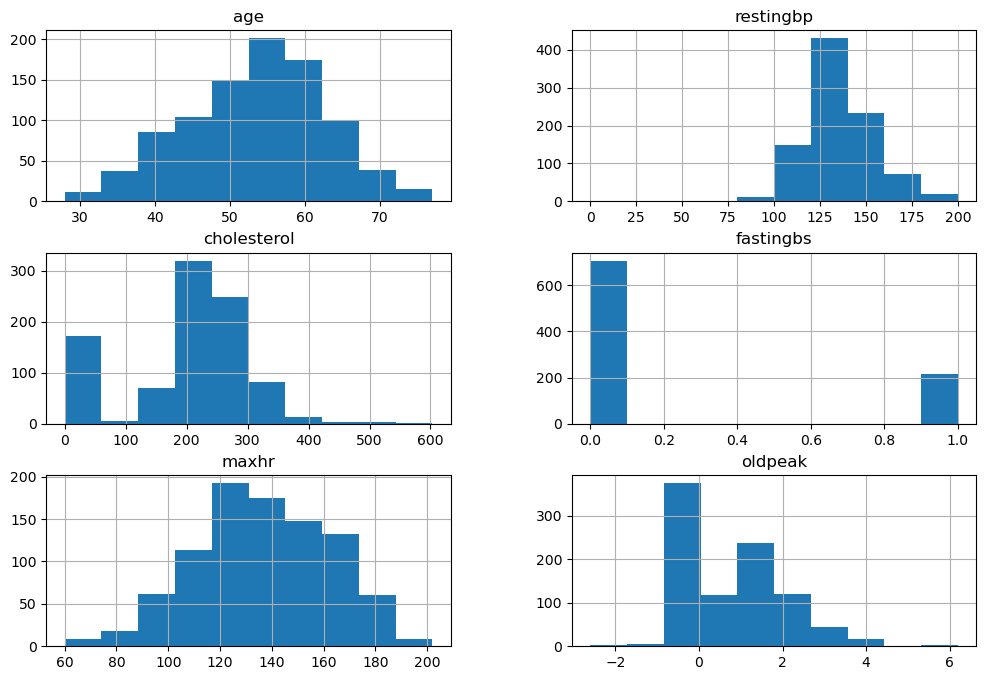

<Axes: >

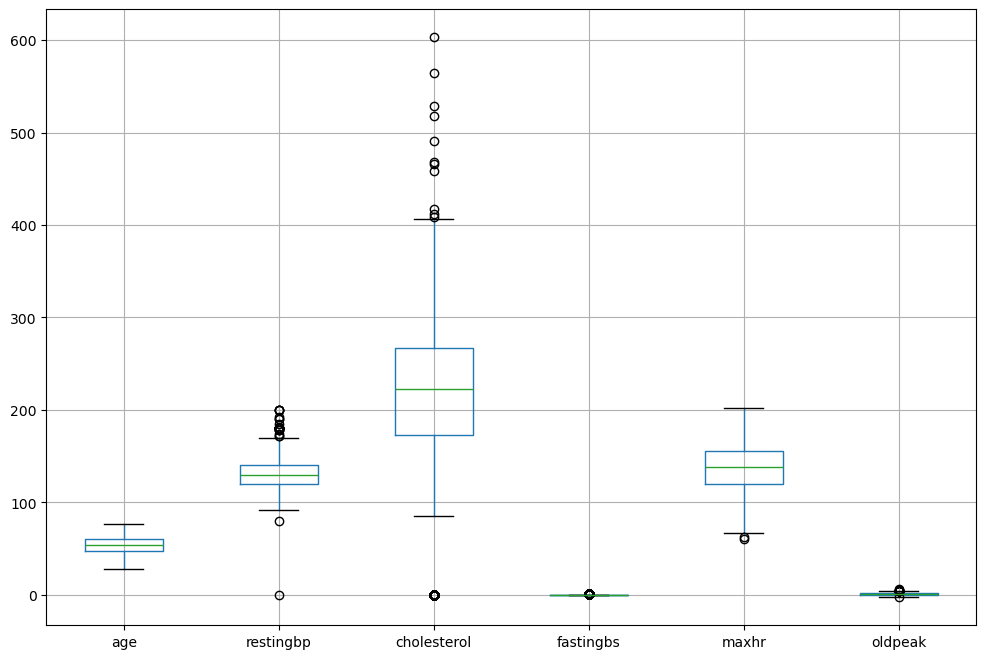

In [54]:
df.hist(figsize=(12,8))
plt.show()

df.boxplot(figsize=(12,8))

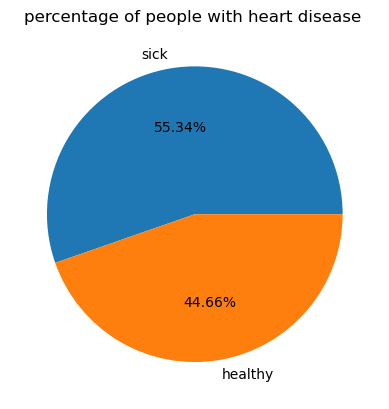

In [55]:
x=df['heartdisease'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.2f%%')
plt.title('percentage of people with heart disease ')
plt.show()

In [56]:
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [59]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [60]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,healthy
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,sick
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,healthy
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,sick
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,healthy


### age

In [61]:
df['age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

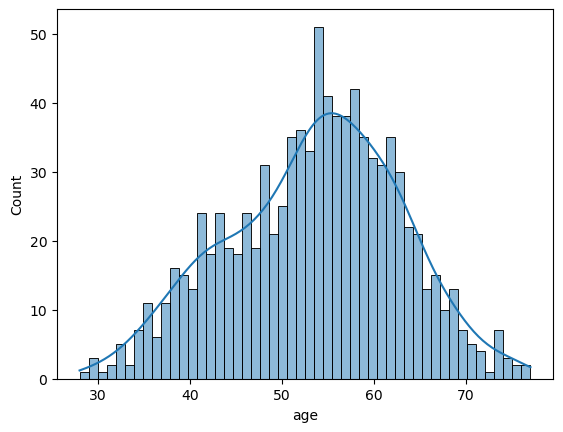

In [62]:
sns.histplot(df['age'],bins=50,kde=True)

In [63]:
def age_classification(x):
    if x<45:
        return 'mid-age'
    if x<60:
        return 'old'
    else:
        return 'elderly'

In [64]:
df['age_classification']=df['age'].apply(age_classification)

<Axes: xlabel='age_classification', ylabel='count'>

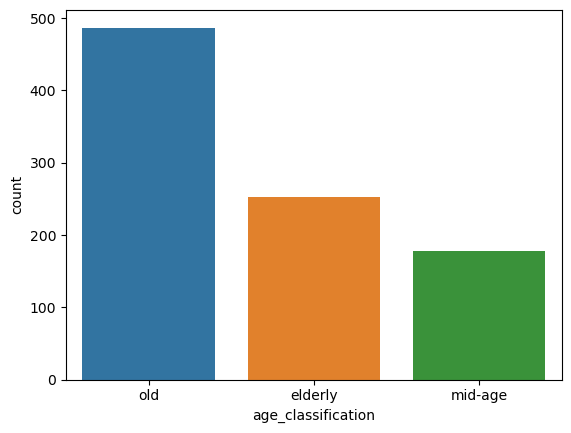

In [65]:
age=df['age_classification'].value_counts().reset_index()

sns.barplot(age,x='age_classification',y='count',hue='age_classification')

<Axes: xlabel='age_classification', ylabel='count'>

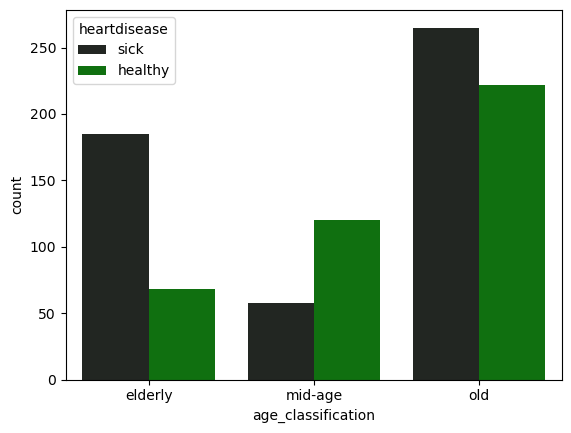

In [66]:
age_x_heartdisease=df.groupby('age_classification')['heartdisease'].value_counts().reset_index()
age_x_heartdisease

sns.barplot(age_x_heartdisease,x='age_classification',y='count',hue='heartdisease',color='green')

### Sex

In [421]:
df['sex'].value_counts()

sex
M    725
F    193
Name: count, dtype: int64

In [422]:
m_count=((df[df['sex']=='F']['heartdisease'].mean())*100)
f_count=((df[df['sex']=='M']['heartdisease'].mean())*100)

print(f'{round(f_count,2)} % of women are likely to get heart disease ')
print(f'{round(m_count,2)} % of men are likely to get heart disease ')
#s_h[0]
#sex=df['sex'].value_counts()

#plt.bar(df['sex'],df['sex'].value_counts())

63.17 % of women are likely to get heart disease 
25.91 % of men are likely to get heart disease 


In [ ]:

########################################################

In [424]:
#plt.bar(label,values)
#plt.show()

### Angina

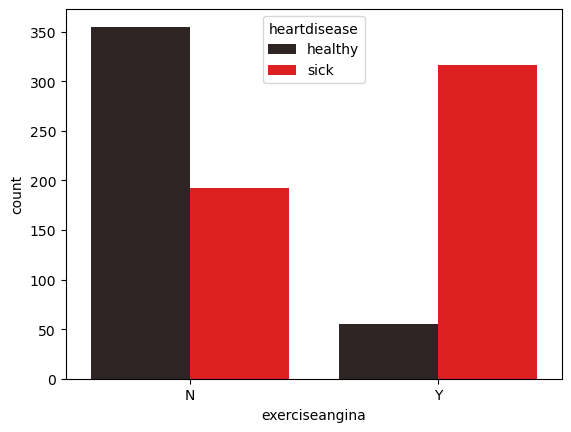

In [75]:
agina_x_heartdisease=df.groupby('exerciseangina')['heartdisease'].value_counts().reset_index()

agina_x_heartdisease

sns.barplot(agina_x_heartdisease,x='exerciseangina',y='count',hue='heartdisease',color='red')

plt.show()

### chestpain

In [76]:
df['chestpaintype'].value_counts()

df.groupby('chestpaintype')['heartdisease'].value_counts()



chestpaintype  heartdisease
ASY            sick            392
               healthy         104
ATA            healthy         149
               sick             24
NAP            healthy         131
               sick             72
TA             healthy          26
               sick             20
Name: count, dtype: int64

heartdisease   healthy  sick
chestpaintype               
ASY                104   392
ATA                149    24
NAP                131    72
TA                  26    20


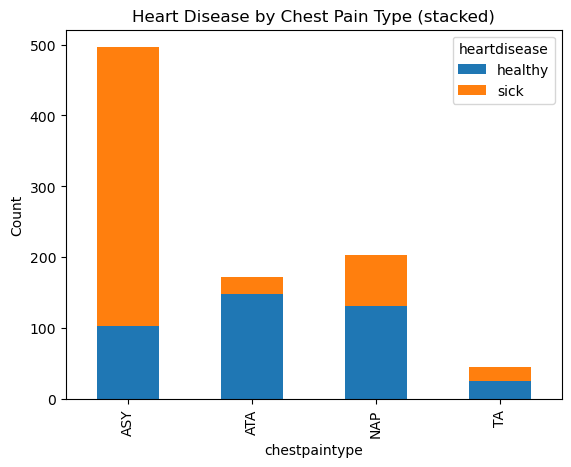

In [77]:
ct = pd.crosstab(df["chestpaintype"], df["heartdisease"])
print(ct)
ct.plot(kind="bar", stacked=True)
plt.ylabel("Count")
plt.title("Heart Disease by Chest Pain Type (stacked)")
plt.show()

### Resting ECG

In [429]:
df['restingecg'].value_counts()

restingecg
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: xlabel='restingecg', ylabel='count'>

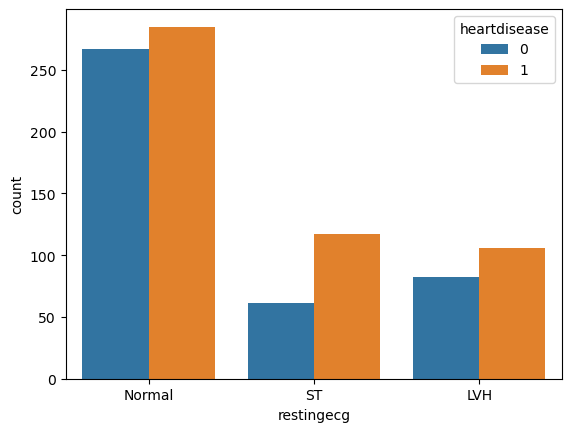

In [430]:
df.groupby('restingecg')['heartdisease'].value_counts()
sns.countplot(data=df,x='restingecg',hue='heartdisease')

### Fasting BS

<Axes: xlabel='fastingbs', ylabel='count'>

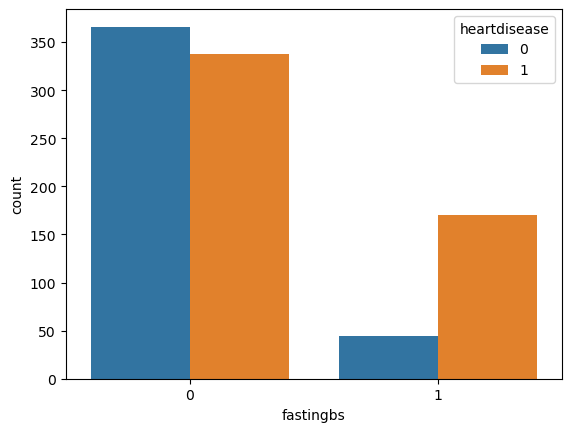

In [431]:
df.groupby('fastingbs')['heartdisease'].value_counts()

sns.countplot(data=df,x='fastingbs',hue='heartdisease')

### Resting BP

In [432]:
df.groupby('restingbp')['heartdisease'].value_counts()
df['restingbp'].value_counts()
df['restingbp'].describe()
df[df['restingbp']==0]
df.loc[449,'restingbp']=110



In [433]:
df.groupby('restingbp')['heartdisease'].value_counts()
df['restingbp'].value_counts()
df['restingbp'].describe()

count    918.000000
mean     132.516340
std       18.005308
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: restingbp, dtype: float64

In [434]:
def bp_classification(x):
    if x<120:
        return 'normal'
    elif x<130:
        return 'elevated'
    elif x<140:
        return 'stage1'
    elif x>=140:
        return 'stage2'
    elif x>180:
        return 'crisis'

In [435]:
df['restingbp_classification']=df['restingbp'].apply(bp_classification)

<Axes: xlabel='restingbp_classification', ylabel='count'>

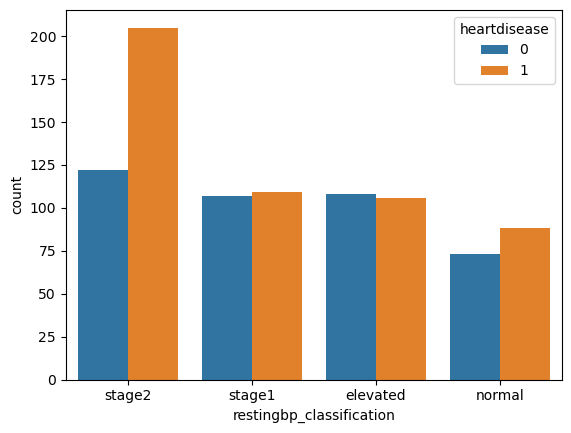

In [436]:
df['restingbp_classification'].value_counts()
x=df.groupby('restingbp_classification')['heartdisease'].value_counts()
sns.countplot(data=df,x='restingbp_classification',hue='heartdisease')


In [437]:
#df[df['cholesterol']==0]

### heart rate

In [438]:
def heart_rate_classification(x):
    if x<90:
        return 'bradycardia'
    elif x<110:
        return 'slight bradycardia'
    elif x<160:
        return 'normal'
    elif x<180:
        return 'slight tachycardia'
    elif x>180:
        return 'tachycardia'

In [439]:
df['heart_rate_classification']=df['maxhr'].apply(heart_rate_classification)

In [440]:
df['heart_rate_classification'].value_counts()

heart_rate_classification
normal                592
slight tachycardia    164
slight bradycardia     98
bradycardia            27
tachycardia            27
Name: count, dtype: int64

<Axes: xlabel='heart_rate_classification', ylabel='count'>

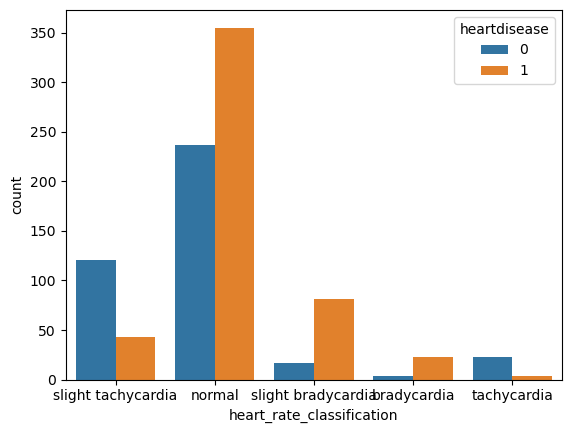

In [441]:
name=df.groupby('heart_rate_classification')['heartdisease'].value_counts()

sns.countplot(data=df, x='heart_rate_classification', hue="heartdisease")

### old peak

In [442]:
#df['oldpeak'].value_counts()

### ST slope

In [443]:
df['st_slope'].value_counts()

st_slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

<Axes: xlabel='st_slope', ylabel='count'>

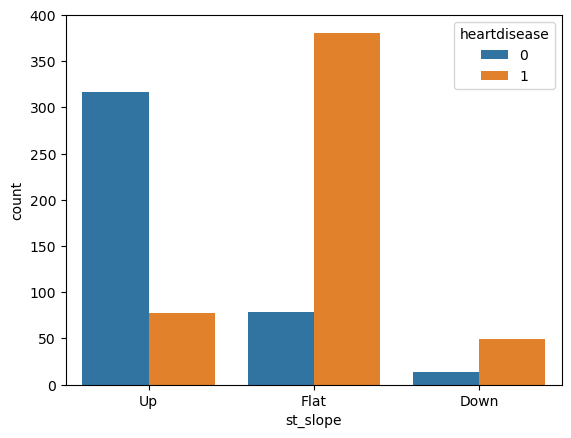

In [444]:
df.groupby('st_slope')['heartdisease'].value_counts()

sns.countplot(data=df,x='st_slope',hue='heartdisease')

### chestpain relating to bp

<Axes: xlabel='restingbp_classification', ylabel='count'>

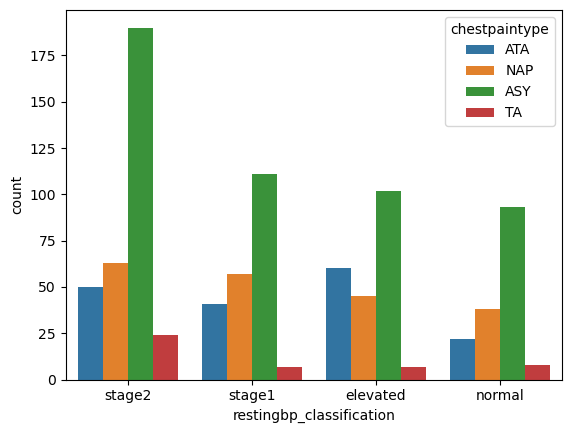

In [445]:
df.groupby('restingbp_classification')['chestpaintype'].value_counts()
sns.countplot(data=df,x='restingbp_classification',hue='chestpaintype')

#### age and bp

<Axes: xlabel='age_classification', ylabel='count'>

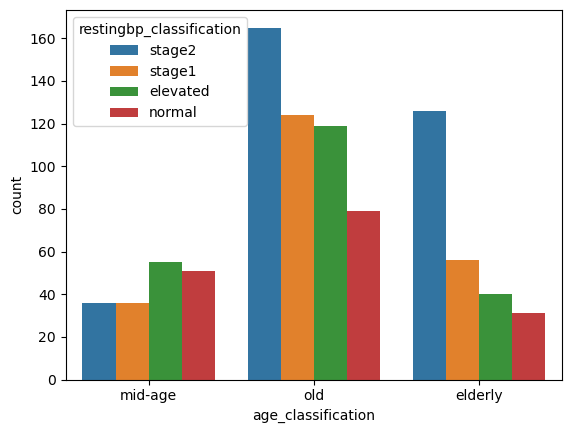

In [446]:
df.groupby('age_classification')['restingbp_classification'].value_counts()
sns.countplot(data=df, x="age_classification", hue="restingbp_classification")

### heart rate and bp

<Axes: xlabel='restingbp_classification', ylabel='count'>

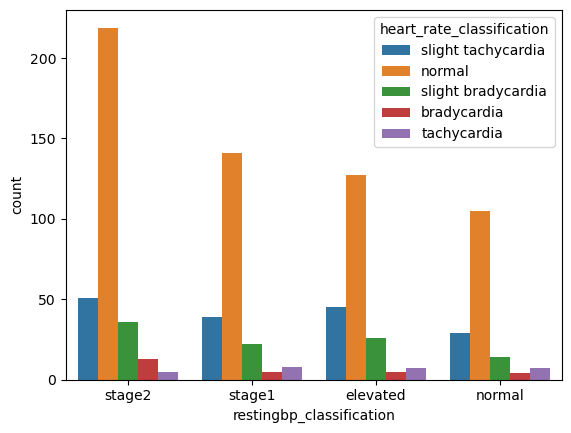

In [447]:
df.groupby('restingbp_classification')['heart_rate_classification'].value_counts()
sns.countplot(data=df,x='restingbp_classification',hue='heart_rate_classification')

### heart rate stslope

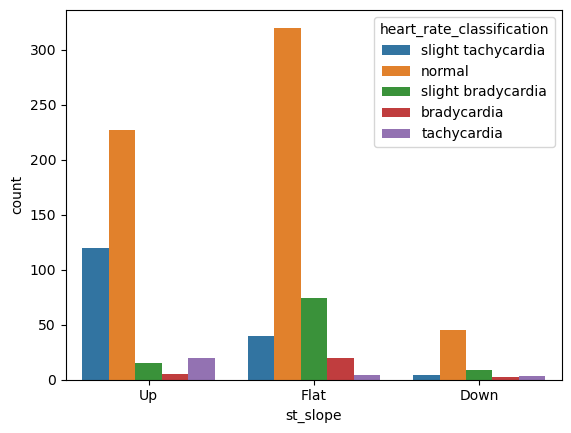

In [448]:
df.groupby('st_slope')['heart_rate_classification'].value_counts()

sns.countplot(data=df,x='st_slope',hue='heart_rate_classification')
plt.show()

### d

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        918 non-null    int64  
 1   sex                        918 non-null    object 
 2   chestpaintype              918 non-null    object 
 3   restingbp                  918 non-null    int64  
 4   cholesterol                918 non-null    int64  
 5   fastingbs                  918 non-null    int64  
 6   restingecg                 918 non-null    object 
 7   maxhr                      918 non-null    int64  
 8   exerciseangina             918 non-null    object 
 9   oldpeak                    918 non-null    float64
 10  st_slope                   918 non-null    object 
 11  heartdisease               918 non-null    int64  
 12  age_classification         918 non-null    object 
 13  restingbp_classification   918 non-null    object 

In [450]:
df

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,age_classification,restingbp_classification,heart_rate_classification
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,mid-age,stage2,slight tachycardia
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,old,stage2,normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,mid-age,stage1,slight bradycardia
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,old,stage1,slight bradycardia
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,old,stage2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,old,normal,normal
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,elderly,stage2,normal
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,old,stage1,normal
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,old,stage1,slight tachycardia


In [451]:
df.drop(['age','restingbp','maxhr','cholesterol'],axis=1,inplace=True)
df

,sex,chestpaintype,fastingbs,restingecg,exerciseangina,oldpeak,st_slope,heartdisease,age_classification,restingbp_classification,heart_rate_classification
0,M,ATA,0,Normal,N,0.0,Up,0,mid-age,stage2,slight tachycardia
1,F,NAP,0,Normal,N,1.0,Flat,1,old,stage2,normal
2,M,ATA,0,ST,N,0.0,Up,0,mid-age,stage1,slight bradycardia
3,F,ASY,0,Normal,Y,1.5,Flat,1,old,stage1,slight bradycardia
4,M,NAP,0,Normal,N,0.0,Up,0,old,stage2,normal
...,...,...,...,...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,1.2,Flat,1,old,normal,normal
914,M,ASY,1,Normal,N,3.4,Flat,1,elderly,stage2,normal
915,M,ASY,0,Normal,Y,1.2,Flat,1,old,stage1,normal
916,F,ATA,0,LVH,N,0.0,Flat,1,old,stage1,slight tachycardia


<Axes: >

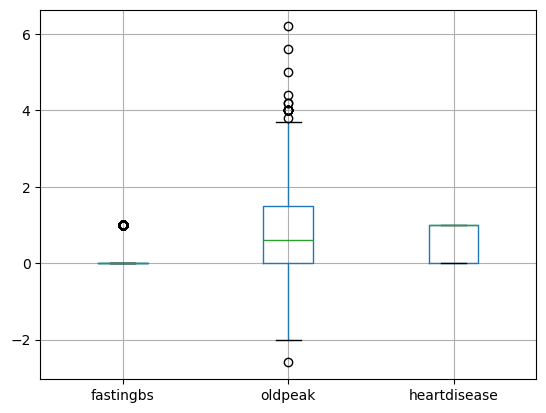

In [452]:
df.boxplot()

### Machine Learning Model 

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder # no order
from sklearn.preprocessing import LabelEncoder  # order

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
#from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [454]:
df.select_dtypes('O').columns

Index(['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope',
       'age_classification', 'restingbp_classification',
       'heart_rate_classification'],
      dtype='object')

In [455]:
hot=OneHotEncoder(sparse_output=False)
le=LabelEncoder()

In [456]:
hot_cols = ["chestpaintype", "restingecg"]

encoded = hot.fit_transform(df[hot_cols])

df_encoded = pd.DataFrame(
    encoded,
    columns=hot.get_feature_names_out(hot_cols),
    index=df.index 
)

df = df.drop(hot_cols, axis=1).join(df_encoded)

print(df.head())

  sex  fastingbs exerciseangina  oldpeak st_slope  heartdisease  \
0   M          0              N      0.0       Up             0   
1   F          0              N      1.0     Flat             1   
2   M          0              N      0.0       Up             0   
3   F          0              Y      1.5     Flat             1   
4   M          0              N      0.0       Up             0   

  age_classification restingbp_classification heart_rate_classification  \
0            mid-age                   stage2        slight tachycardia   
1                old                   stage2                    normal   
2            mid-age                   stage1        slight bradycardia   
3                old                   stage1        slight bradycardia   
4                old                   stage2                    normal   

   chestpaintype_ASY  chestpaintype_ATA  chestpaintype_NAP  chestpaintype_TA  \
0                0.0                1.0                0.0        

In [457]:
le_cols = ["sex", "exerciseangina", "age_classification",'st_slope','restingbp_classification','heart_rate_classification']

for col in le_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   sex  fastingbs  exerciseangina  oldpeak  st_slope  heartdisease  \
0    1          0               0      0.0         2             0   
1    0          0               0      1.0         1             1   
2    1          0               0      0.0         2             0   
3    0          0               1      1.5         1             1   
4    1          0               0      0.0         2             0   

   age_classification  restingbp_classification  heart_rate_classification  \
0                   1                         3                          3   
1                   2                         3                          1   
2                   1                         2                          2   
3                   2                         2                          2   
4                   2                         3                          1   

   chestpaintype_ASY  chestpaintype_ATA  chestpaintype_NAP  chestpaintype_TA  \
0                0.0          

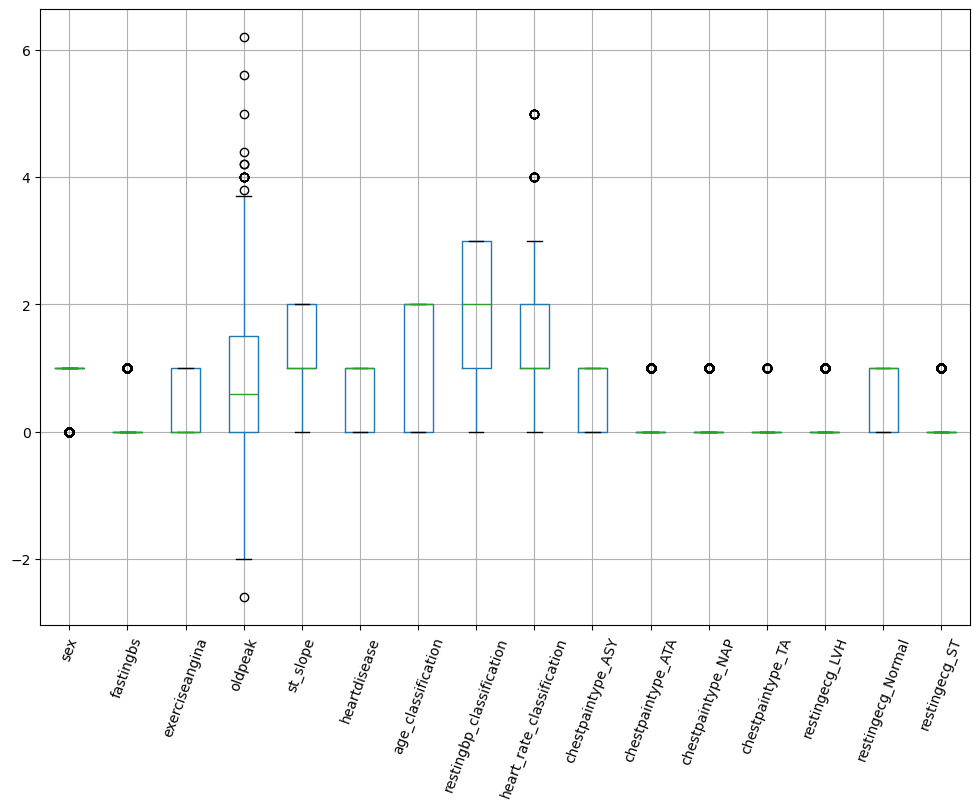

In [458]:
df.boxplot(figsize=(12,8))
plt.xticks(rotation=70)
plt.show()

<Axes: >

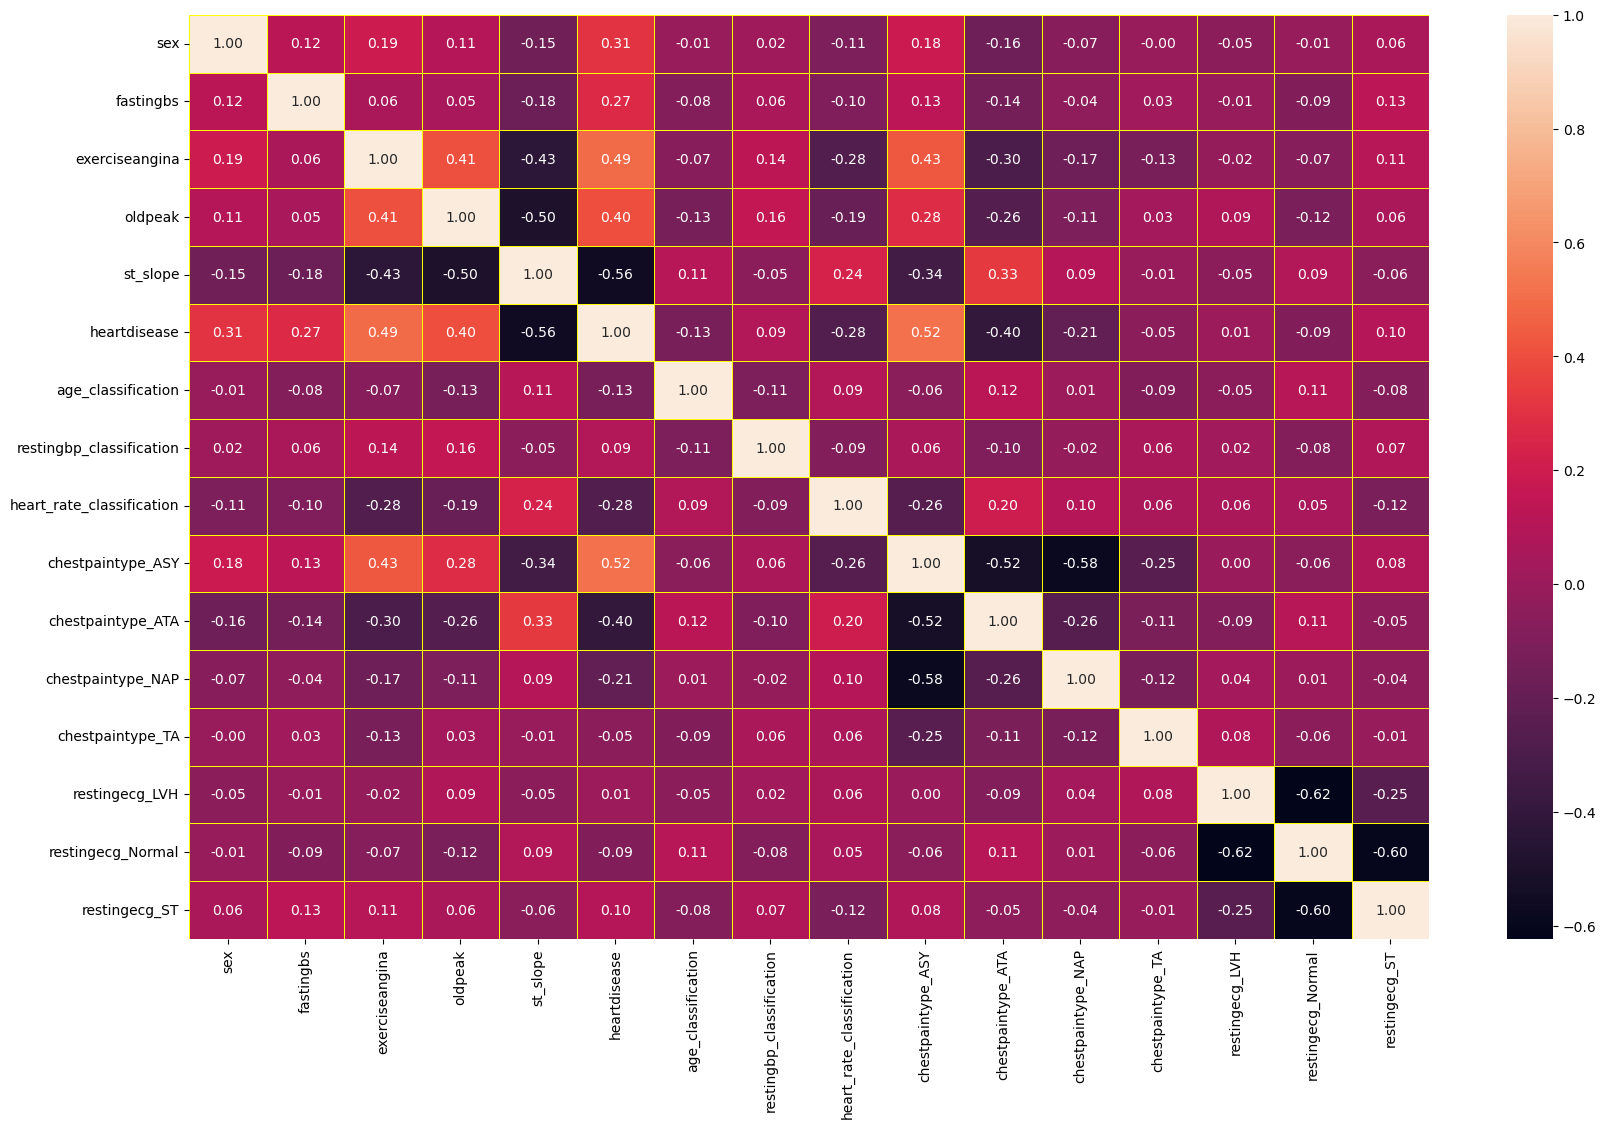

In [459]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5,linecolor='yellow')

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        918 non-null    int32  
 1   fastingbs                  918 non-null    int64  
 2   exerciseangina             918 non-null    int32  
 3   oldpeak                    918 non-null    float64
 4   st_slope                   918 non-null    int32  
 5   heartdisease               918 non-null    int64  
 6   age_classification         918 non-null    int32  
 7   restingbp_classification   918 non-null    int32  
 8   heart_rate_classification  918 non-null    int32  
 9   chestpaintype_ASY          918 non-null    float64
 10  chestpaintype_ATA          918 non-null    float64
 11  chestpaintype_NAP          918 non-null    float64
 12  chestpaintype_TA           918 non-null    float64
 13  restingecg_LVH             918 non-null    float64

In [478]:
x=df.drop('heartdisease',axis=1)
y=df['heartdisease']

print(x.shape)
print(y.shape)

(918, 15)
(918,)


In [462]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [463]:
x_train

,sex,fastingbs,exerciseangina,oldpeak,st_slope,age_classification,restingbp_classification,heart_rate_classification,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST
795,1,1,0,0.8,0,1,0,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25,1,0,0,0.0,2,1,2,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0
84,1,1,1,1.0,1,2,3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0,0,0,0.0,2,1,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
344,1,1,0,0.0,1,2,0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0.0,2,2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
270,1,0,0,0.0,2,2,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,1,0,1,1.4,2,0,2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,1,0,1,0.0,2,0,3,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [464]:
scaler=RobustScaler()

scaler.fit(x_train)

# Transform both training and test data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [465]:
x_test=pd.DataFrame(x_test)
x_train=pd.DataFrame(x_train)

In [466]:
model1=LogisticRegression()
model2=SVC()
model3=KNeighborsClassifier()
model4=DecisionTreeClassifier()
model5=GaussianNB()
model6=RandomForestClassifier()
model7=GradientBoostingClassifier()

models=[model1,model2,model3,model4,model5,model6,model7]

In [467]:
model8=LogisticRegression()
model9=SVC(kernel='linear', probability=True)
model10=KNeighborsClassifier()
model11=DecisionTreeClassifier(max_depth=10)
model12=GaussianNB()
model13=RandomForestClassifier(n_estimators=1000, random_state=41)
model14=GradientBoostingClassifier(n_estimators=100)

models_2=[model8,model9,model10,model11,model12,model13,model14]

### logistic regression 

In [468]:
param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "penalty": ["l2"]   
    },
    
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 9, 11, 15],
        "weights": ["uniform", "distance"],
        "p": [1, 2]   
    },
    
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    
    "GaussianNB": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    
    "RandomForestClassifier": {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"]
    },
    
    "GradientBoostingClassifier": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "subsample": [0.8, 1.0]
    }
}


In [ ]:
'''models = {
    "LogisticRegression": model1,
    "SVC": model2,
    "KNeighborsClassifier": model3,
    "DecisionTreeClassifier": model4,
    "GaussianNB": model5,
    "RandomForestClassifier": model6,
    "GradientBoostingClassifier": model7
}

best_models = {}

for name, model in models.items():
    print(f"Tuning {name} ...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="f1",   # optimize for F1 (change if needed)
        cv=5,
        n_jobs=-1,
        verbose=2
    )
    grid.fit(x_train, y_train)
    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best CV Score: {grid.best_score_}")
    best_models[name] = grid.best_estimator_
'''

'for name, model in models.items():\n    print(f"Tuning {name} ...")\n    grid = GridSearchCV(\n        estimator=model,\n        param_grid=param_grids[name],\n        scoring="f1",   # optimize for F1 (change if needed)\n        cv=5,\n        n_jobs=-1,\n        verbose=2\n    )\n    grid.fit(x_train, y_train)\n    print(f"Best Params for {name}: {grid.best_params_}")\n    print(f"Best CV Score: {grid.best_score_}")\n    best_models[name] = grid.best_estimator_\n'

In [470]:
print(best_models)

{}


In [471]:
model1=LogisticRegression(C=1, solver='liblinear')
model2=SVC(C=1, kernel='linear')
model3=KNeighborsClassifier(n_neighbors=9, p=1)
model4=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)
model5=GaussianNB()
model6=RandomForestClassifier(max_features='log2', min_samples_split=5)
model7=GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=2,subsample=0.8)

models=[model1,model2,model3,model4,model5,model6,model7]

In [472]:
col=['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]
result4=[]

col2=['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','GradientBoostingClassifier']
result5=[]
result6=[]
result7=[]
result8=[]

In [473]:
def cal(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    recall=recall_score(pred,y_test)
    precision=precision_score(pred,y_test)
    f1=f1_score(pred,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(precision)
    result4.append(f1)

    sns.heatmap(confusion_matrix(pred,y_test),fmt='.2f',annot=True)
    print(model)
    print(f'''
              accuracy:  {accuracy} ,
              recall:    {recall} ,
              precision: {precision} ,
              f1:        {f1}

''')

def cal2(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    recall=recall_score(pred,y_test)
    precision=precision_score(pred,y_test)
    f1=f1_score(pred,y_test)

    result5.append(accuracy)
    result6.append(recall)
    result7.append(precision)
    result8.append(f1)

    sns.heatmap(confusion_matrix(pred,y_test),fmt='.2f',annot=True)
    print(model)
    print(f'''
              accuracy:  {accuracy} ,
              recall:    {recall} ,
              precision: {precision} ,
              f1:        {f1}

''')





LogisticRegression(C=1, solver='liblinear')

              accuracy:  0.842391304347826 ,
              recall:    0.8979591836734694 ,
              precision: 0.822429906542056 ,
              f1:        0.8585365853658536


SVC(C=1, kernel='linear')

              accuracy:  0.8369565217391305 ,
              recall:    0.8811881188118812 ,
              precision: 0.8317757009345794 ,
              f1:        0.8557692307692307


KNeighborsClassifier(n_neighbors=9, p=1)

              accuracy:  0.8478260869565217 ,
              recall:    0.9072164948453608 ,
              precision: 0.822429906542056 ,
              f1:        0.8627450980392157


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

              accuracy:  0.8152173913043478 ,
              recall:    0.9010989010989011 ,
              precision: 0.7663551401869159 ,
              f1:        0.8282828282828283


GaussianNB()

              accuracy:  0.842391304347826 ,
              re

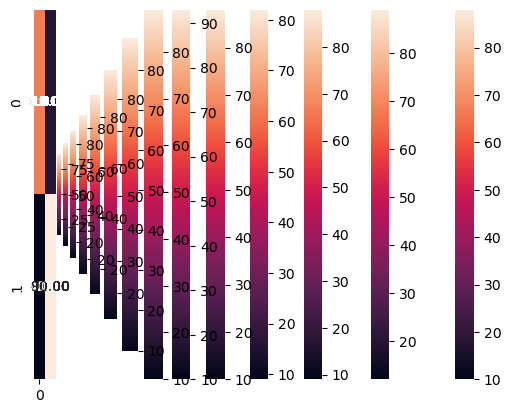

In [474]:
for i in models:
    cal(i)

for i in models_2:
    cal2(i)

In [475]:
final_result=pd.DataFrame({'algorithms':col,'accuracies':result1,'recall':result2,'presicion':result3,'f1':result4 })

final_result2=pd.DataFrame({'algorithms':col2,'accuracies':result5,'recall':result6,'presicion':result7,'f1':result8 })

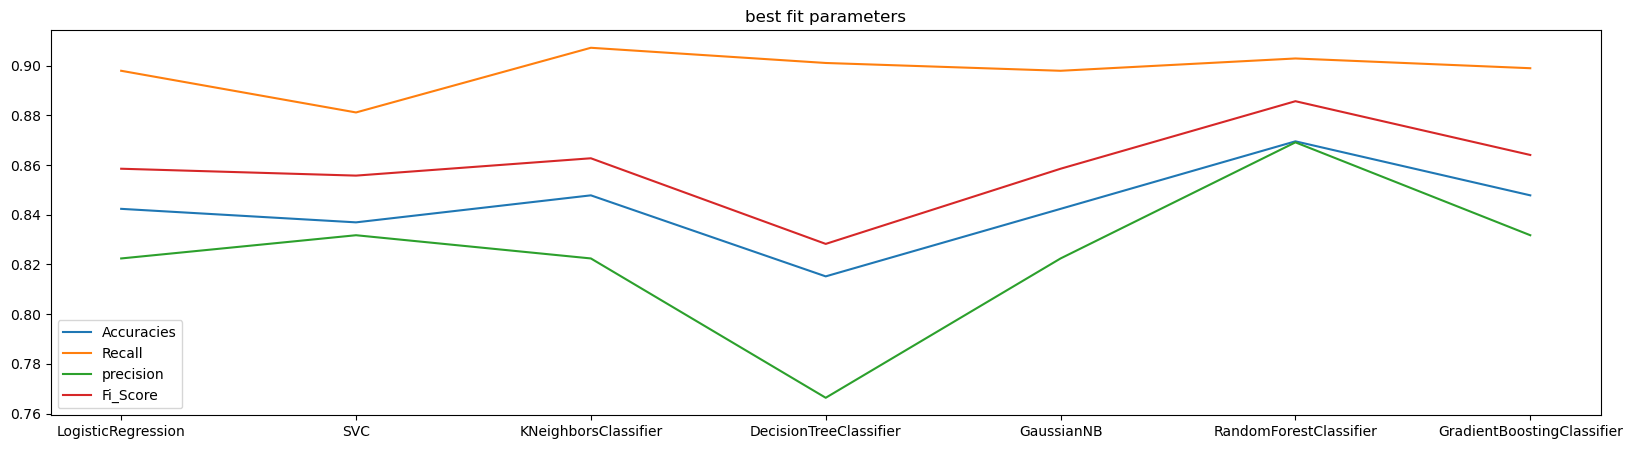

In [476]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.algorithms,result1, label='Accuracies')
plt.plot(final_result.algorithms,result2 , label='Recall')
plt.plot(final_result.algorithms,result3 , label='precision')
plt.plot(final_result.algorithms,result4 , label='Fi_Score')
plt.title('best fit parameters')
plt.legend()
plt.show()

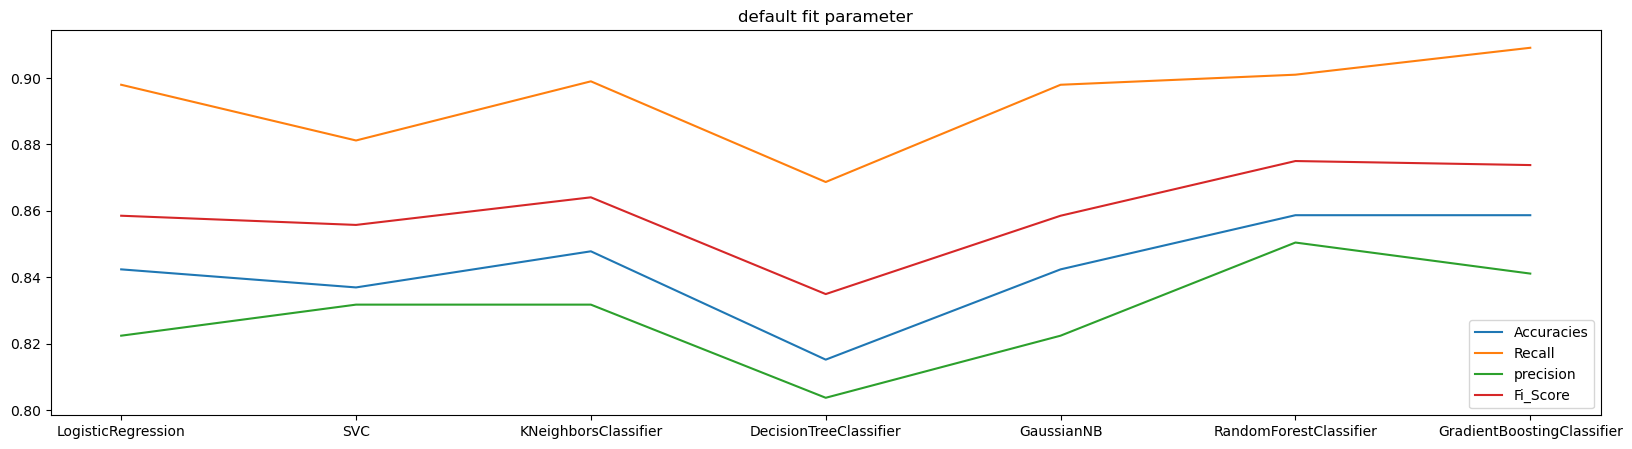

In [477]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result2.algorithms,result5, label='Accuracies')
plt.plot(final_result2.algorithms,result6 , label='Recall')
plt.plot(final_result2.algorithms,result7 , label='precision')
plt.plot(final_result2.algorithms,result8 , label='Fi_Score')
plt.legend()
plt.title('default fit parameter')
plt.show()